In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
from src import data

In [6]:
import os

In [7]:
df = pd.read_csv(
    os.path.join(data.data_root, 'external', 'imperial_college_covid_estimates', 'results.csv'),
    parse_dates=['time']
).set_index(
    ['time']
).drop(
    columns=['Unnamed: 0']
).rename(
    mapper={
        'predicted_infections_higher_CI_95_cumulative.1':'predicted_infections_higher_CI_95'
    },
    axis='columns'
)

In [8]:
df.country.unique()

array(['Denmark', 'Italy', 'Germany', 'Spain', 'United_Kingdom', 'France',
       'Norway', 'Belgium', 'Austria', 'Sweden', 'Switzerland', 'Greece',
       'Portugal', 'Netherlands'], dtype=object)

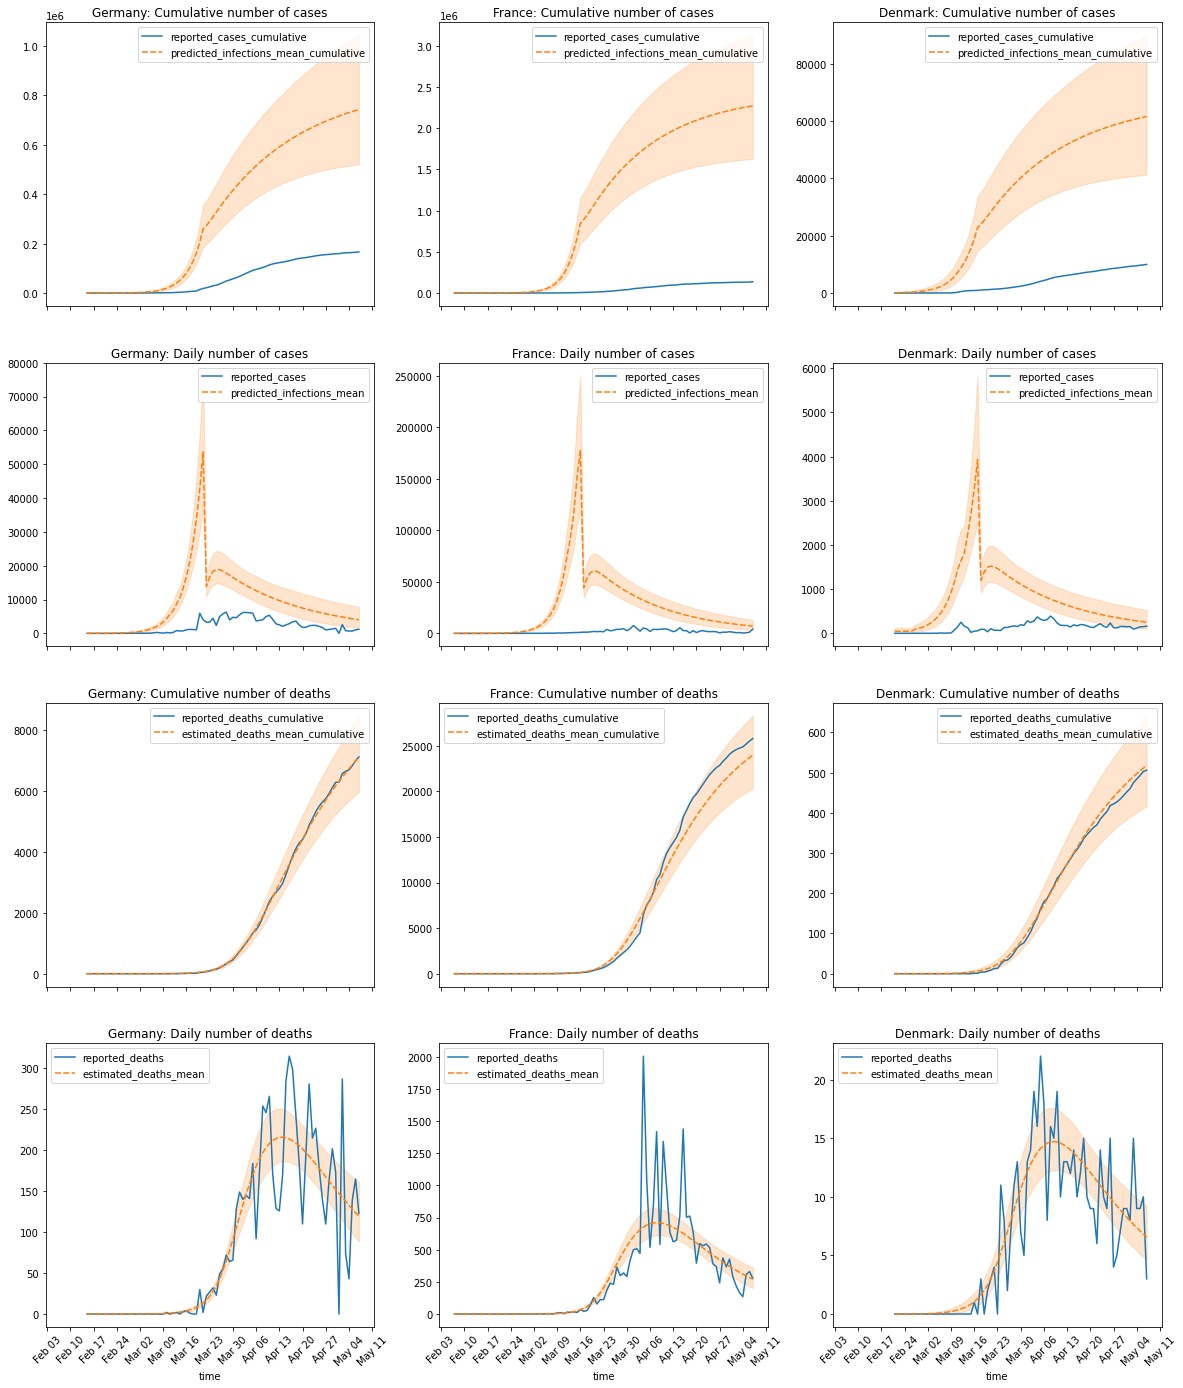

In [11]:
nrows=4

fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(20,nrows*6), sharex=True)

for i, country in enumerate(['Germany', 'France', 'Denmark']):
    ax = axs[0,i]
    sns.lineplot(
        data=df.loc[
            df.country == country,
            [
                'reported_cases_cumulative',
                'predicted_infections_mean_cumulative',
            ]
        ],
        ax=ax
    )
    ax.fill_between(
        df.loc[df.country == country].index.values,
        df.loc[df.country == country].predicted_infections_lower_CI_95_cumulative, 
        df.loc[df.country == country].predicted_infections_higher_CI_95_cumulative,
        color=sns.color_palette()[1],
        alpha=0.2
    )
    ax.set_title(f'{country}: Cumulative number of cases')

    ax = axs[1,i]
    sns.lineplot(
        data=df.loc[
            df.country == country,
            [
                'reported_cases',
                'predicted_infections_mean',
            ]
        ],
        ax=ax
    )
    ax.fill_between(
        df.loc[df.country == country].index.values,
        df.loc[df.country == country].predicted_infections_lower_CI_95, 
        df.loc[df.country == country].predicted_infections_higher_CI_95, 
        color=sns.color_palette()[1],
        alpha=0.2
    )
    ax.set_title(f'{country}: Daily number of cases')

    ax=axs[2,i]
    sns.lineplot(
        data=df.loc[
            df.country == country,
            [
                'reported_deaths_cumulative',
                'estimated_deaths_mean_cumulative',
            ]
        ],
        ax=ax
    )
    ax.fill_between(
        df.loc[df.country == country].index.values,
        df.loc[df.country == country].estimated_deaths_lower_CI_95_cumulative, 
        df.loc[df.country == country].estimated_deaths_higher_CI_95_cumulative,
        color=sns.color_palette()[1],
        alpha=0.2
    )
    ax.set_title(f'{country}: Cumulative number of deaths')
    
    ax=axs[3,i]
    sns.lineplot(
        data=df.loc[
            df.country == country,
            [
                'reported_deaths',
                'estimated_deaths_mean',
            ]
        ],
        ax=ax
    )
    ax.fill_between(
        df.loc[df.country == country].index.values,
        df.loc[df.country == country].estimated_deaths_lower_CI_95, 
        df.loc[df.country == country].estimated_deaths_higher_CI_95,
        color=sns.color_palette()[1],
        alpha=0.2
    )
    ax.set_title(f'{country}: Daily number of deaths')
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_tick_params(rotation=45)
    